In [15]:
import csv

def unique_subcellular_locations(csv_path):
    unique_locations = set()

    with open(csv_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
     
        for row in reader:
            locations = row['Subcellular location'].split(';')
            for location in locations:
                sub_locations = location.split(',')
                for sub_location in sub_locations:
                    clean_location = sub_location.strip().lower()
                    if clean_location:
                        unique_locations.add(clean_location)
    
    return list(unique_locations)

def save_locations_to_csv(locations, output_csv_path):
    with open(output_csv_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Subcellular Location'])
        for location in locations:
            writer.writerow([location])

csv_path = "/Volumes/dax-hd/project-data/search-files/uniprot-data.csv"
output_csv_path = "/Volumes/dax-hd/project-data/search-files/unique_subcellular_locations.csv"

unique_locations = unique_subcellular_locations(csv_path)
save_locations_to_csv(unique_locations, output_csv_path)

print("Unique Subcellular Locations saved to CSV.")

Unique Subcellular Locations saved to CSV.


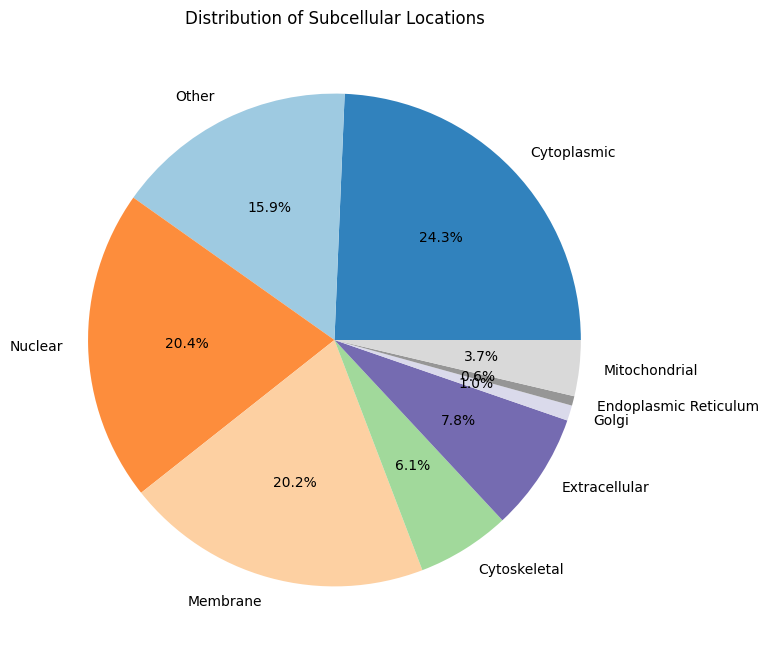

In [17]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

csv_path = "/Volumes/dax-hd/project-data/search-files/uniprot-data.csv"

def categorize_location(location):
    location = location.lower()
    nuclear_keywords = ['nucleus', 'nucleolus', 'nucleoplasm', 'nuclear', 'nucleoid', 'chromosome', 'pml body', 'nucleus envelope', 'nucleus lamina', 'nucleus outer membrane', 'nucleus inner membrane', 'nucleus intermembrane space', 'nucleus membrane', 'nucleus matrix', 'nucleoplasm', 'nuclear body']
    cytoplasmic_keywords = ['cytoplasm', 'cytosol', 'cytoplasmic vesicle', 'cytoplasmic granule', 'cytoplasmic ribonucleoprotein granule', 'cytoplasmic vesicle lumen', 'cytoplasmic granule lumen']
    membrane_keywords = ['membrane', 'cell membrane', 'cell outer membrane', 'cell inner membrane', 'plasma membrane', 'membrane raft', 'basolateral cell membrane', 'apical cell membrane', 'basal cell membrane', 'sarcolemma']
    mitochondrial_keywords = ['mitochondrion', 'mitochondrion intermembrane space', 'mitochondrion nucleoid', 'mitochondrion inner membrane', 'mitochondrion outer membrane', 'mitochondrion matrix']
    extracellular_keywords = ['extracellular', 'secreted', 'extracellular space', 'extracellular exosome', 'extracellular vesicle', 'extracellular matrix', 'surface film', 'interphotoreceptor matrix', 'apoplast', 'cell wall', 'capsule', 'spore wall', 'spore coat', 'cell envelope', 'cell surface', 'cell cortex', 'cell junction']
    golgi_keywords = ['golgi', 'golgi apparatus', 'cis-golgi network', 'trans-golgi network', 'golgi apparatus membrane', 'golgi stack', 'golgi stack membrane', 'golgi lumen']
    er_keywords = ['endoplasmic reticulum', 'er-golgi', 'rough endoplasmic reticulum', 'smooth endoplasmic reticulum', 'endoplasmic reticulum membrane', 'endoplasmic reticulum lumen', 'endoplasmic reticulum-golgi intermediate compartment', 'endoplasmic reticulum-golgi intermediate compartment membrane', 'endoplasmic reticulum-golgi intermediate compartment lumen']
    cytoskeletal_keywords = ['cytoskeleton', 'actin', 'microtubule', 'filament', 'intermediate filament', 'microvillus', 'cortical granule', 'stress fiber', 'centriole', 'centrosome', 'spindle', 'flagellum', 'cilium', 'flagellum basal body', 'cilium axoneme', 'cilium basal body', 'flagellum axoneme', 'actin patch', 'microtubule organizing center']

    if any(keyword in location for keyword in nuclear_keywords):
        return 'Nuclear'
    elif any(keyword in location for keyword in cytoplasmic_keywords):
        return 'Cytoplasmic'
    elif any(keyword in location for keyword in membrane_keywords):
        return 'Membrane'
    elif any(keyword in location for keyword in mitochondrial_keywords):
        return 'Mitochondrial'
    elif any(keyword in location for keyword in extracellular_keywords):
        return 'Extracellular'
    elif any(keyword in location for keyword in golgi_keywords):
        return 'Golgi'
    elif any(keyword in location for keyword in er_keywords):
        return 'Endoplasmic Reticulum'
    elif any(keyword in location for keyword in cytoskeletal_keywords):
        return 'Cytoskeletal'
    else:
        return 'Other'


def count_categories(csv_path):
    category_counts = Counter()

    with open(csv_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            locations = row['Subcellular location'].split(';')
            for location in locations:
                sub_locations = location.split(',')
                for sub_location in sub_locations:
                    clean_location = sub_location.strip().lower()
                    if clean_location:
                        category = categorize_location(clean_location)
                        category_counts[category] += 1

    return category_counts

category_counts = count_categories(csv_path)

colors = cm.tab20c(np.linspace(0, 1, len(category_counts)))

plt.figure(figsize=(10, 8))
# Fix: 'colors=colors' to apply the colormap, and correct the parameter name 'colors' to 'color'
plt.pie(category_counts.values(), labels=category_counts.keys(), colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Subcellular Locations')
plt.show()
